# Stock Prices Prediction

These days it recommends getting data from Quandl rather than kaggle if data related about economics data:

## Load Data

In [2]:
import pandas as pd
import quandl
import datetime
import matplotlib.pyplot as plt
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

# Let's get Apple stock data; Apple's ticker symbol is AAPL
s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)

type(apple)

pandas.core.frame.DataFrame

In [4]:
apple.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-01-04,102.61,105.368,102.00,105.35,67649387.0,0.0,1.0,99.136516,101.801154,98.547165,101.783763,67649387.0
2016-01-05,105.75,105.850,102.41,102.71,55790992.0,0.0,1.0,102.170223,102.266838,98.943286,99.233131,55790992.0
2016-01-06,100.56,102.370,99.87,100.70,68457388.0,0.0,1.0,97.155911,98.904640,96.489269,97.291172,68457388.0
2016-01-07,98.68,100.130,96.43,96.45,81094428.0,0.0,1.0,95.339552,96.740467,93.165717,93.185040,81094428.0
2016-01-08,98.55,99.110,96.76,96.96,70798016.0,0.0,1.0,95.213952,95.754996,93.484546,93.677776,70798016.0


## Data Description

In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 560 entries, 2016-01-04 to 2018-03-27
Data columns (total 12 columns):
Open           560 non-null float64
High           560 non-null float64
Low            560 non-null float64
Close          560 non-null float64
Volume         560 non-null float64
Ex-Dividend    560 non-null float64
Split Ratio    560 non-null float64
Adj. Open      560 non-null float64
Adj. High      560 non-null float64
Adj. Low       560 non-null float64
Adj. Close     560 non-null float64
Adj. Volume    560 non-null float64
dtypes: float64(12)
memory usage: 56.9 KB


In [6]:
apple.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,560.000000,560.000000,560.000000,560.000000,5.600000e+02,560.000000,560.0,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,132.036371,133.059852,131.063928,132.113256,3.299208e+07,0.007250,1.0,130.741487,131.753847,129.778974,130.817100,3.299208e+07
std,28.092494,28.227610,27.881171,28.037322,1.539654e+07,0.064622,0.0,29.078630,29.222821,28.858992,29.024310,1.539654e+07
min,90.000000,91.670000,89.470000,90.340000,1.147592e+07,0.000000,1.0,87.955883,89.587953,87.437920,88.288161,1.147592e+07
25%,106.635000,107.672500,105.882500,106.887500,2.328830e+07,0.000000,1.0,104.673430,105.296836,103.747377,104.403406,2.328830e+07
50%,132.770000,133.380000,132.400000,132.855000,2.871073e+07,0.000000,1.0,131.694544,132.299603,131.327541,131.778856,2.871073e+07
75%,156.735000,157.705000,155.323750,156.162500,3.741461e+07,0.000000,1.0,156.640000,157.705000,155.150075,156.092500,3.741461e+07
max,182.590000,183.500000,180.210000,181.720000,1.333697e+08,0.630000,1.0,182.590000,183.500000,180.210000,181.720000,1.333697e+08


# Data Visualization for adjusted data

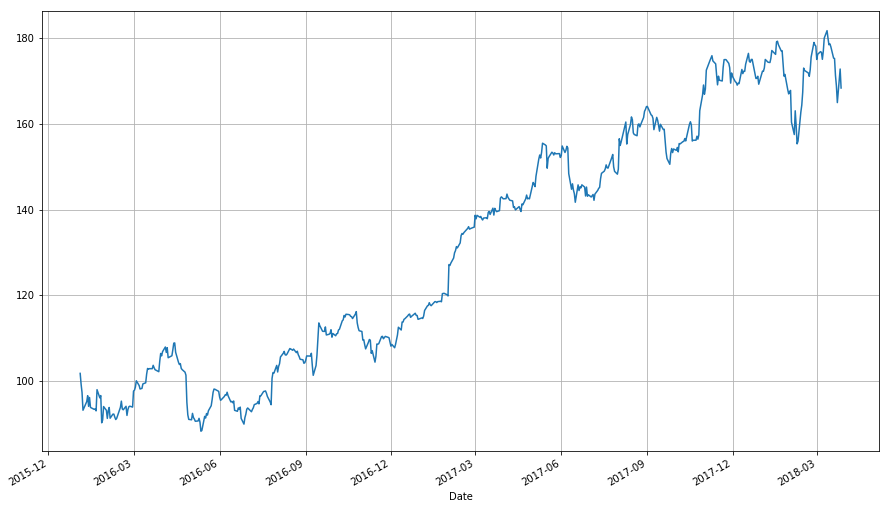

In [7]:
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
apple["Adj. Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

In [13]:
microsoft, google = (quandl.get("WIKI/" + s, start_date=start, end_date=end) for s in ["MSFT", "GOOG"])
# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Adj. Close"],
                      "MSFT": microsoft["Adj. Close"],
                      "GOOG": google["Adj. Close"]})
stocks.head()

,AAPL,MSFT,GOOG
Date,,,
2016-01-04,101.783763,52.181598,741.84
2016-01-05,99.233131,52.419653,742.58
2016-01-06,97.291172,51.467434,743.62
2016-01-07,93.185040,49.677262,726.39
2016-01-08,93.677776,49.829617,714.47


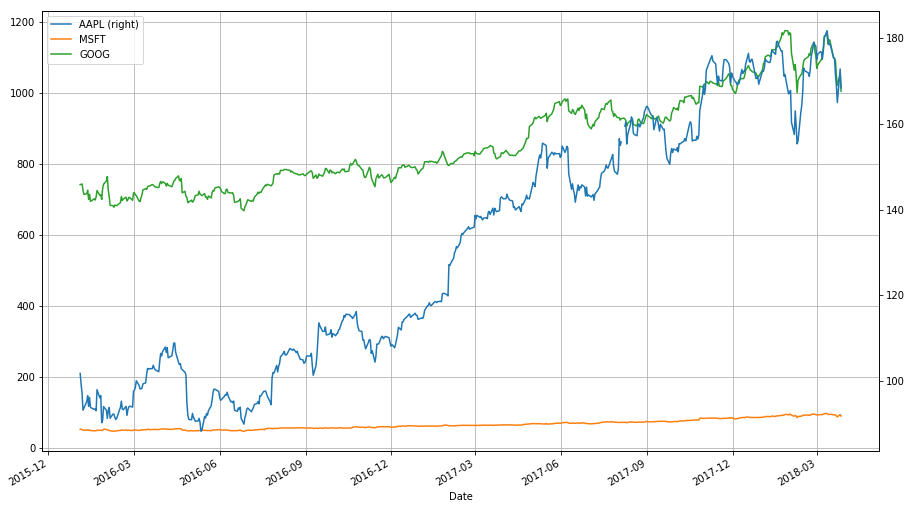

In [15]:
stocks.plot(secondary_y = ["AAPL"], grid = True)

# Candlestick OHLC 

##### Using candlestimck_ohlc libariry in order to convert to time series

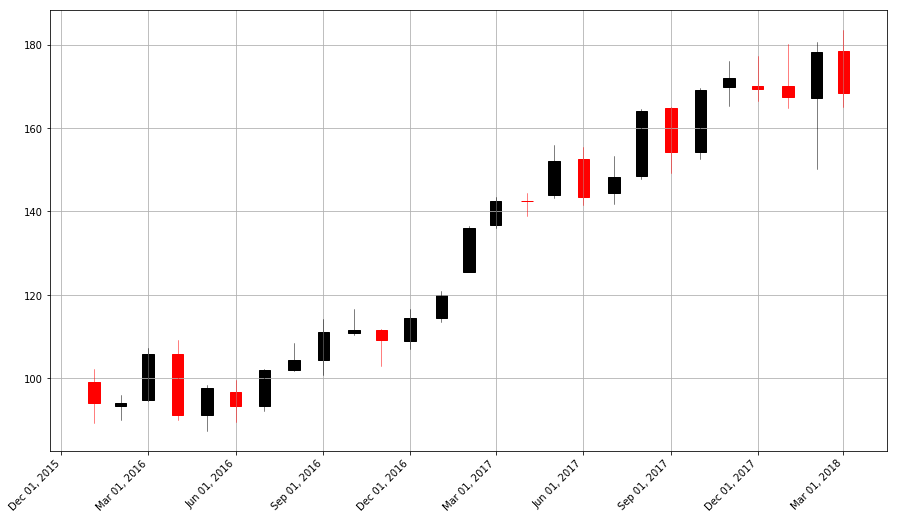

In [12]:
from matplotlib.dates import DateFormatter, WeekdayLocator,DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
import candlestick_ohlc  
pandas_candlestick_ohlc(apple, adj=True, stick="month")